# Results

In [16]:
from pathlib import Path

import pandas as pd
import matplotlib.pyplot as plt

from src.helpers.visualization import plot_rul_from_dataframe
from src.helpers.metrics import  build_metrics_table

In [ ]:
data_name = "DS03"
degmodel_name = 'normal'
filtered_data = True
pfnet_dir_name = 'net256x256x128x64x32leaky0.05'

filtered_text = "_filtered" if filtered_data else ""
experiment_dir = Path('experiments')/data_name
pfnet_dir = experiment_dir/f'degradation{filtered_text}'/degmodel_name/'pf_performs'/pfnet_dir_name

## Load Predictions

In [ ]:
df_preds = pd.read_csv(pfnet_dir / "rul_test_predictions.csv")

## Degradation Predictions

In [33]:
hi_df = pd.read_csv(experiment_dir/f'hidata_test{filtered_text}.csv')
test_units = hi_df['unit'].astype(int).unique().tolist()
onsets = {unit: hi_df[(hi_df['unit']==unit) & (hi_df['hs']==0)]['cycle'].values[0] for unit in test_units}
df_degpreds = df_preds[
    df_preds["time"] > df_preds["unit"].map(onsets)
]

## Metrics

In [36]:
metrics_df = build_metrics_table(df_preds)
metrics_df

,unit,RMSE,Score,PICP,PINAW
0,10,4.371232,27.910030,1.000000,0.530251
1,11,10.433059,99.856805,0.931034,0.589881
2,12,16.099619,228.643357,0.836957,0.358356
3,13,6.264879,38.365241,0.934211,0.435298
4,14,3.888020,19.572344,0.986667,0.467385
5,15,5.084481,34.124614,1.000000,0.518529


In [37]:
metrics_df.drop(columns=["unit"]).mean()

RMSE      7.690215
Score    74.745399
PICP      0.948145
PINAW     0.483283
dtype: float64

In [34]:
metrics_df = build_metrics_table(df_degpreds)
metrics_df

,unit,RMSE,Score,PICP,PINAW
0,10,2.763258,10.125554,1.000000,0.582984
1,11,6.407019,27.585410,0.900000,0.645865
2,12,10.557894,63.907534,0.857143,0.350116
3,13,7.045639,35.073092,0.913793,0.463839
4,14,2.157210,5.618977,0.975000,0.479539
5,15,3.573585,10.214234,1.000000,0.539747


In [35]:
metrics_df.drop(columns=["unit"]).mean()

RMSE      5.417434
Score    25.420800
PICP      0.940989
PINAW     0.510348
dtype: float64

# Plot final RUL prediction

In [25]:
df_preds= pd.read_csv(pfnet_dir / f"rul_test_{n_rep}predictions.csv")

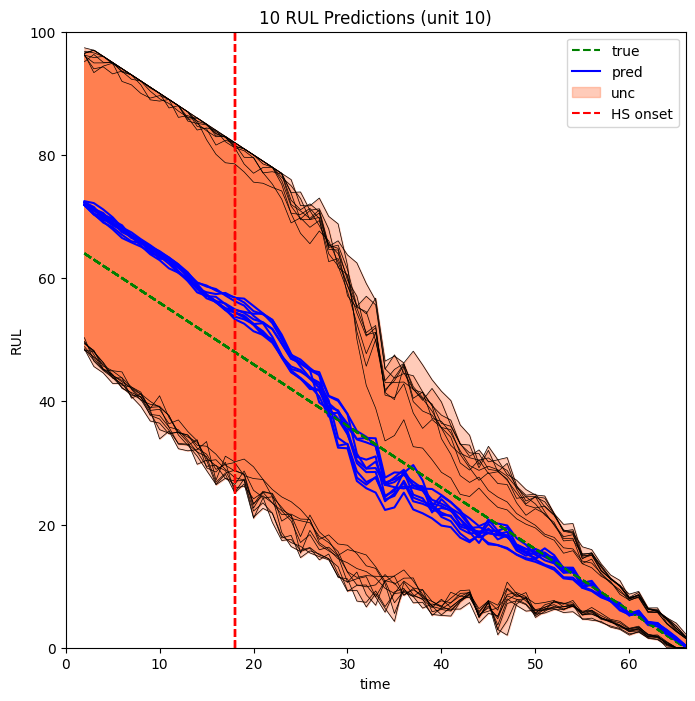

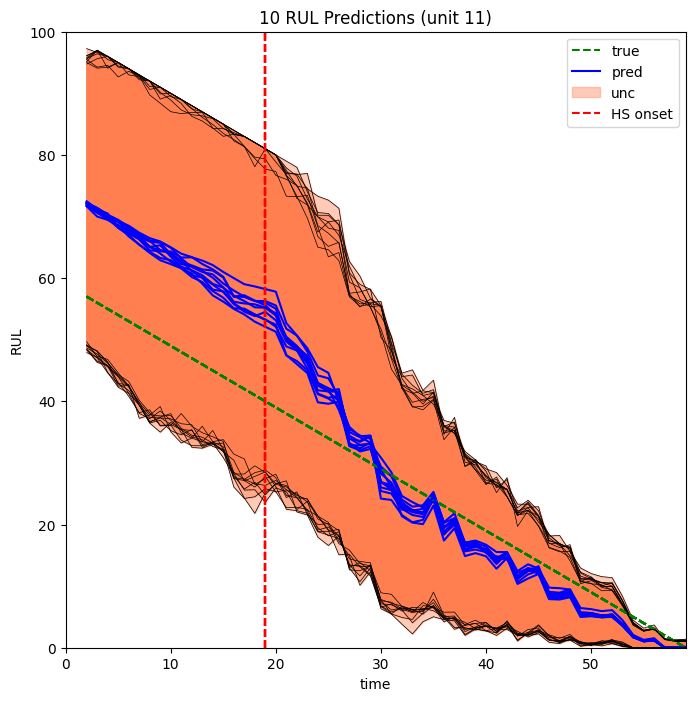

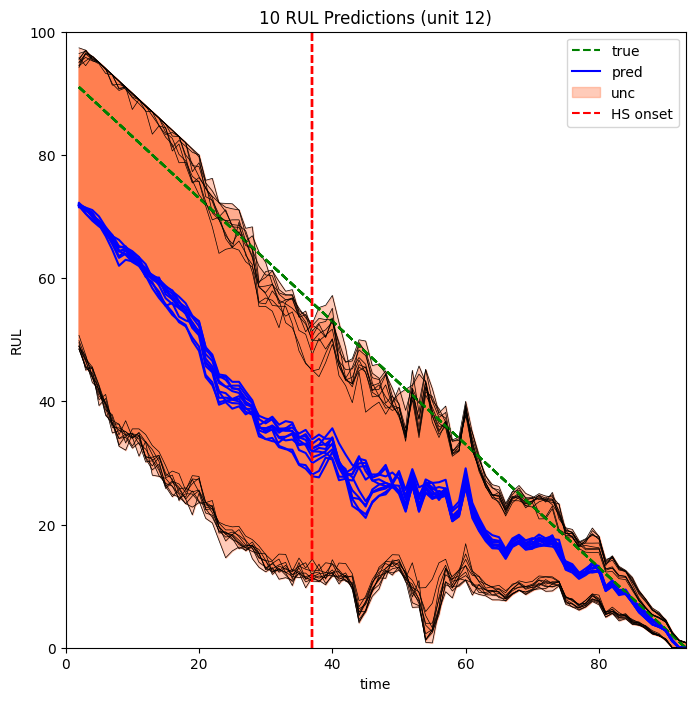

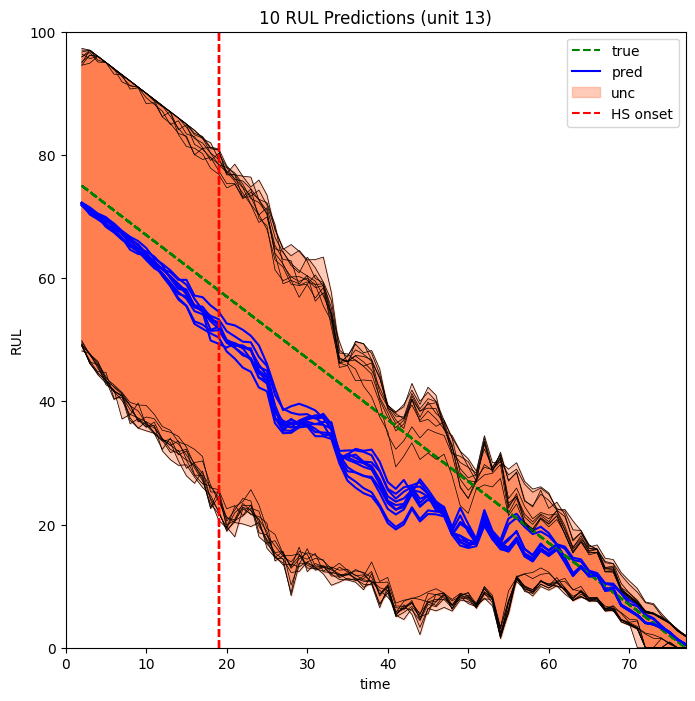

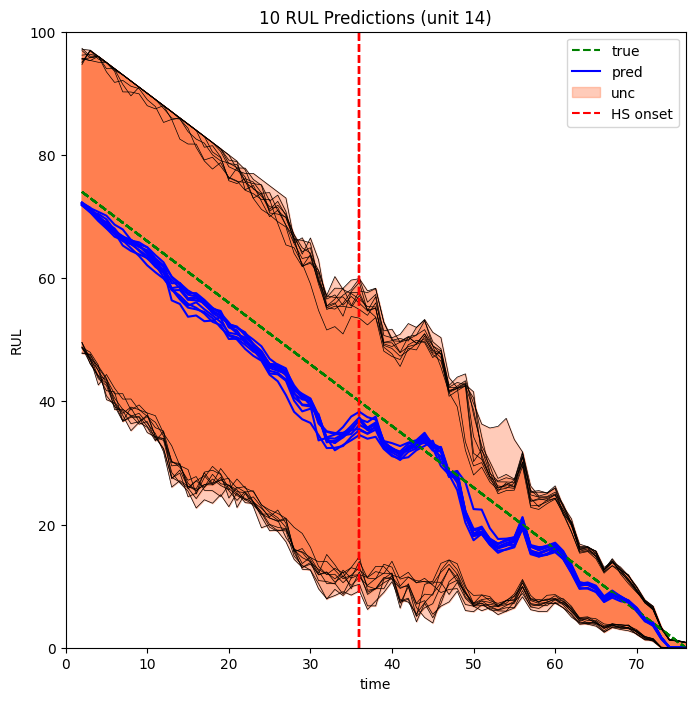

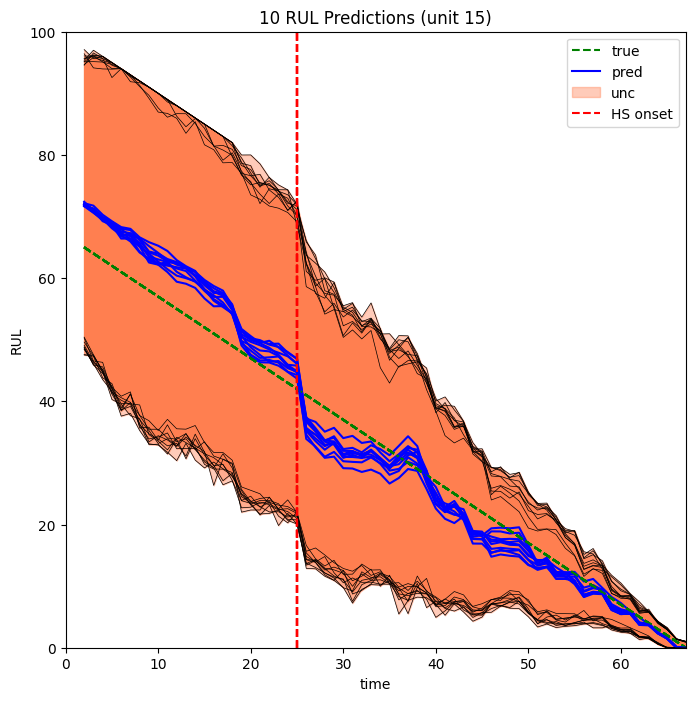

In [26]:
for unit in test_units:
	fig, ax = plt.subplots(figsize=(8, 8))
	for rep in range(n_rep):
		df = df_preds[(df_preds['unit']==unit) & (df_preds['rep']==rep)]
		eol_time = df['time'].iloc[-1]
		plot_rul_from_dataframe(ax=ax, df=df,t_max=eol_time,
				title=f"{n_rep} RUL Predictions (unit {unit})", show_legend=False if rep else True)
		ax.vlines(onsets[unit], ymin=0, ymax=100, colors='red', linestyles='dashed', label='HS onset' if rep==0 else None)
	ax.legend()
	fig.savefig(pfnet_dir / f'rul_test_eval{unit}_rep{n_rep}.png')

In [27]:
df_preds = df_preds.groupby(["unit", "time"], as_index=False).mean()

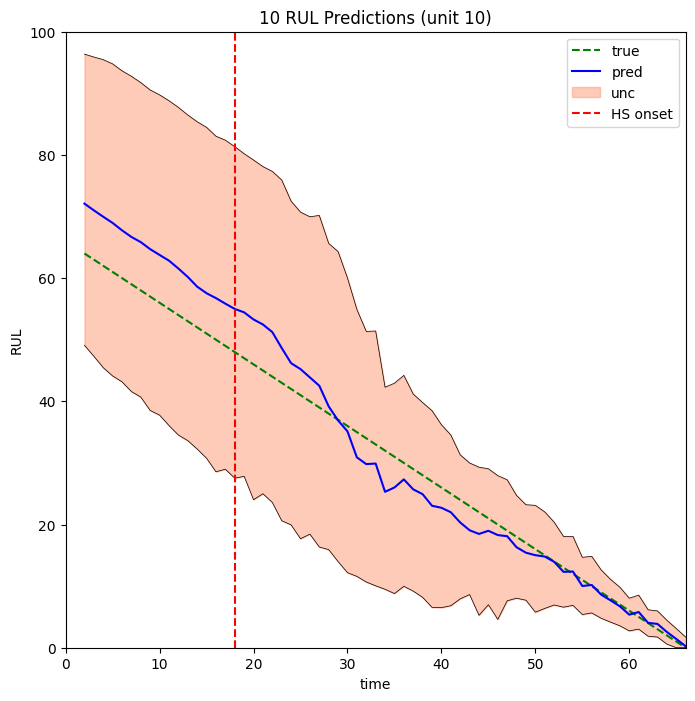

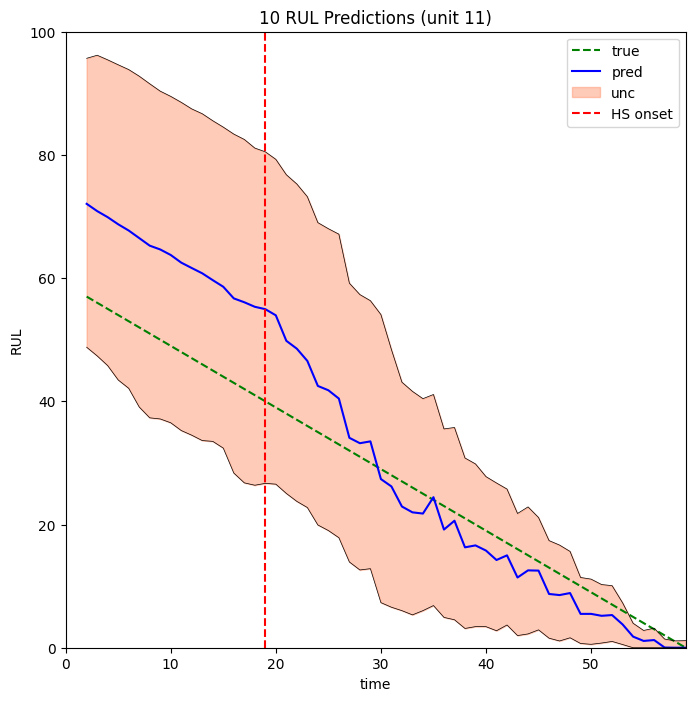

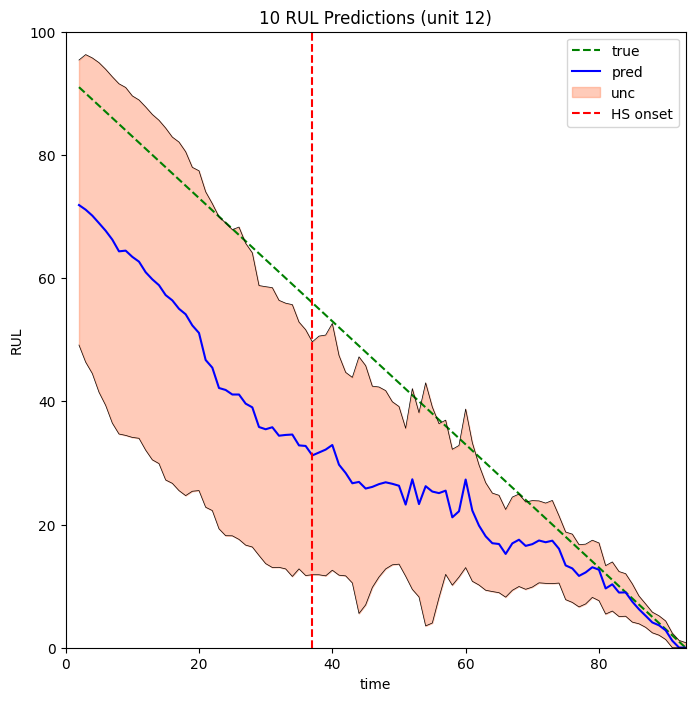

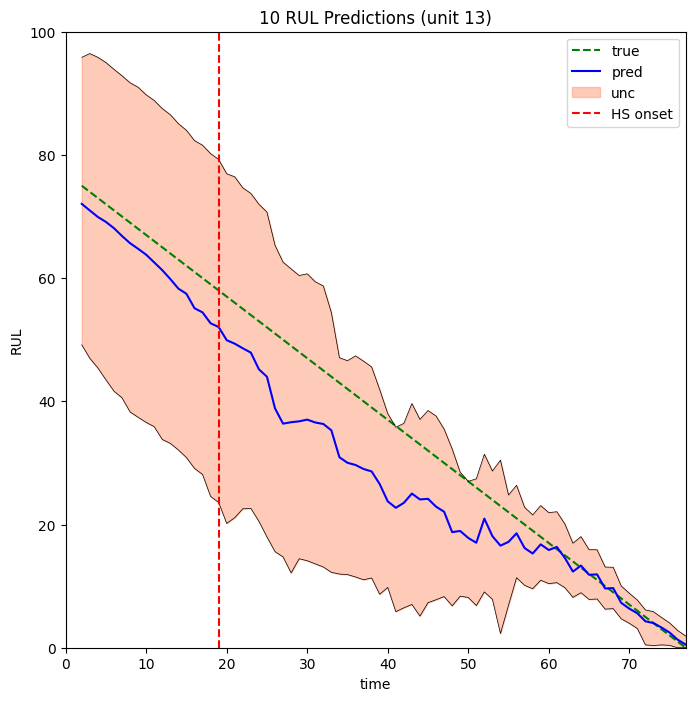

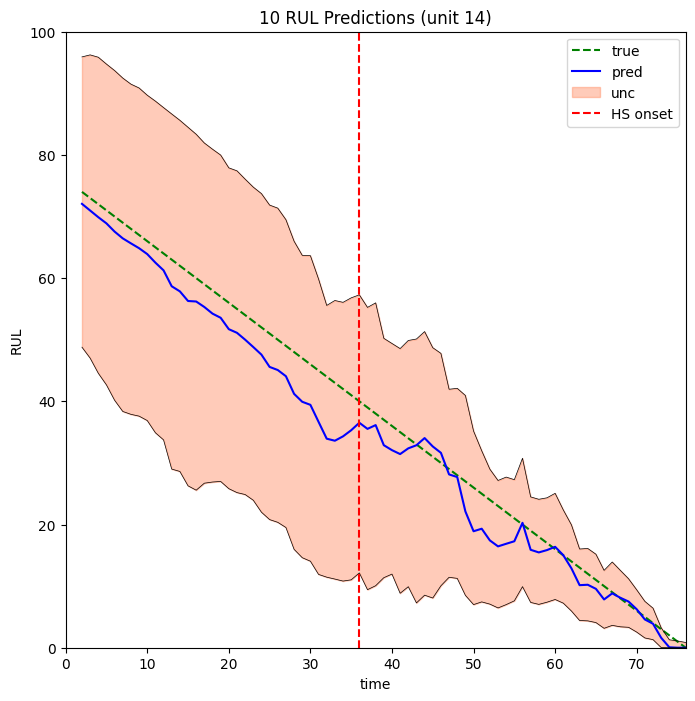

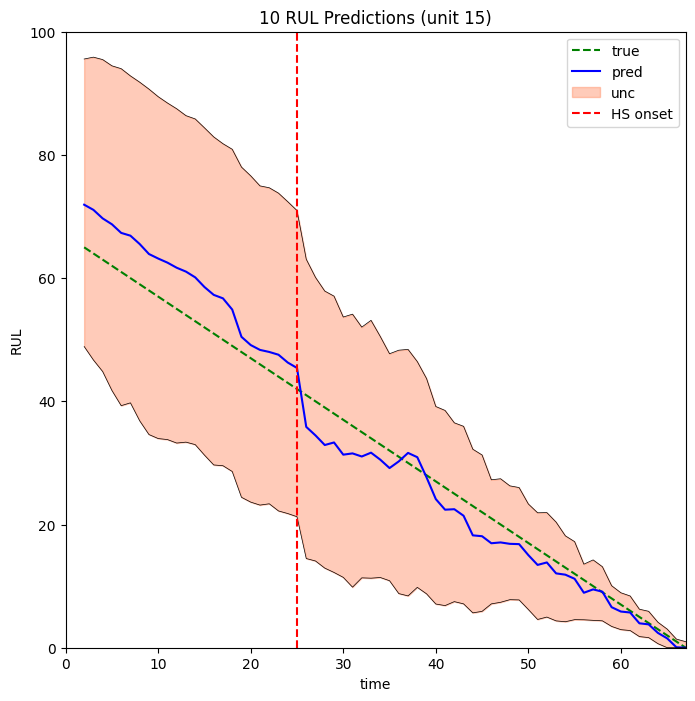

In [28]:
df_preds = df_preds.groupby(["unit", "time"], as_index=False).mean()
for unit in test_units:
    fig, ax = plt.subplots(figsize=(8, 8))
    df = df_preds[df_preds['unit']==unit]
    eol_time = df['time'].iloc[-1]
    plot_rul_from_dataframe(ax=ax, df=df,t_max=eol_time,
            title=f"{n_rep} RUL Predictions (unit {unit})", show_legend= True)
    ax.vlines(onsets[unit], ymin=0, ymax=100, colors='red', linestyles='dashed', label='HS onset')
    ax.legend()
    fig.savefig(pfnet_dir / f'rul_test_eval{unit}_rep{n_rep}.png')
 

# DS03 (normal)

<div>
<style scoped>
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>unit</th>
      <th>RMSE</th>
      <th>Score</th>
      <th>PICP</th>
      <th>PINAW</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>10</td>
      <td>5.159835</td>
      <td>36.226468</td>
      <td>1.000000</td>
      <td>0.541948</td>
    </tr>
    <tr>
      <th>1</th>
      <td>11</td>
      <td>8.826138</td>
      <td>75.009783</td>
      <td>0.948276</td>
      <td>0.603454</td>
    </tr>
    <tr>
      <th>2</th>
      <td>12</td>
      <td>16.378946</td>
      <td>234.349141</td>
      <td>0.684783</td>
      <td>0.353395</td>
    </tr>
    <tr>
      <th>3</th>
      <td>13</td>
      <td>7.017632</td>
      <td>48.047128</td>
      <td>0.934211</td>
      <td>0.424559</td>
    </tr>
    <tr>
      <th>4</th>
      <td>14</td>
      <td>4.354228</td>
      <td>25.626022</td>
      <td>0.986667</td>
      <td>0.466721</td>
    </tr>
    <tr>
      <th>5</th>
      <td>15</td>
      <td>4.689060</td>
      <td>31.752102</td>
      <td>1.000000</td>
      <td>0.515780</td>
    </tr>
  </tbody>
</table>
</div>

RMSE      7.737640\
Score    75.168441\
PICP      0.925656\
PINAW     0.484309

## Old Version

## DS01

<div>
<style scoped>
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>unit</th>
      <th>RMSE</th>
      <th>Score</th>
      <th>PICP</th>
      <th>PINAW</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>7</td>
      <td>5.775061</td>
      <td>55.267201</td>
      <td>0.999001</td>
      <td>0.309502</td>
    </tr>
    <tr>
      <th>1</th>
      <td>8</td>
      <td>3.785441</td>
      <td>57.762069</td>
      <td>1.000000</td>
      <td>0.295153</td>
    </tr>
    <tr>
      <th>2</th>
      <td>9</td>
      <td>6.018379</td>
      <td>99.245554</td>
      <td>1.000000</td>
      <td>0.428916</td>
    </tr>
    <tr>
      <th>3</th>
      <td>10</td>
      <td>5.708555</td>
      <td>92.050901</td>
      <td>0.998796</td>
      <td>0.415006</td>
    </tr>
  </tbody>
</table>
</div>

RMSE:	5.321859\
Score:	76.081431\
PICP:	0.999449\
PINAW:	0.362144

## DS03

<div>
<style scoped>
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>unit</th>
      <th>RMSE</th>
      <th>Score</th>
      <th>PICP</th>
      <th>PINAW</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>10</td>
      <td>1.970763</td>
      <td>16.453508</td>
      <td>1.000000</td>
      <td>0.383870</td>
    </tr>
    <tr>
      <th>1</th>
      <td>11</td>
      <td>7.169923</td>
      <td>104.176352</td>
      <td>0.991818</td>
      <td>0.430604</td>
    </tr>
    <tr>
      <th>2</th>
      <td>12</td>
      <td>15.045545</td>
      <td>382.033190</td>
      <td>0.507948</td>
      <td>0.242492</td>
    </tr>
    <tr>
      <th>3</th>
      <td>13</td>
      <td>6.132815</td>
      <td>44.879145</td>
      <td>0.987355</td>
      <td>0.315902</td>
    </tr>
    <tr>
      <th>4</th>
      <td>14</td>
      <td>3.357752</td>
      <td>23.227942</td>
      <td>0.998947</td>
      <td>0.370075</td>
    </tr>
    <tr>
      <th>5</th>
      <td>15</td>
      <td>2.875275</td>
      <td>18.082909</td>
      <td>1.000000</td>
      <td>0.376594</td>
    </tr>
  </tbody>
</table>
</div>


RMSE:	6.092012\
Score:	98.142175\
PICP:	0.914345\
PINAW:	0.353256

## DS05 

<div>
<style scoped>
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>unit</th>
      <th>RMSE</th>
      <th>Score</th>
      <th>PICP</th>
      <th>PINAW</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>7</td>
      <td>9.023385</td>
      <td>129.525538</td>
      <td>0.996078</td>
      <td>0.370195</td>
    </tr>
    <tr>
      <th>1</th>
      <td>8</td>
      <td>11.351902</td>
      <td>207.492181</td>
      <td>0.998291</td>
      <td>0.339061</td>
    </tr>
    <tr>
      <th>2</th>
      <td>9</td>
      <td>3.117663</td>
      <td>23.322696</td>
      <td>0.997016</td>
      <td>0.408783</td>
    </tr>
    <tr>
      <th>3</th>
      <td>10</td>
      <td>7.332727</td>
      <td>102.286471</td>
      <td>1.000000</td>
      <td>0.334772</td>
    </tr>
  </tbody>
</table>
</div>

RMSE:       7.706419\
Score:    115.656722\
PICP:       0.997846\
PINAW:      0.363203

# Plot final RUL prediction

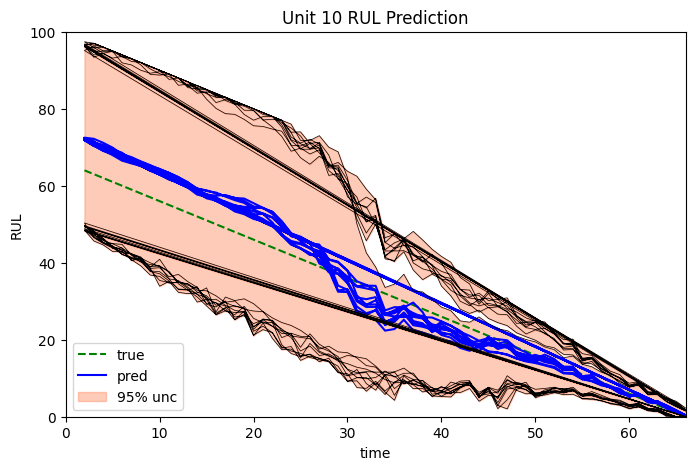

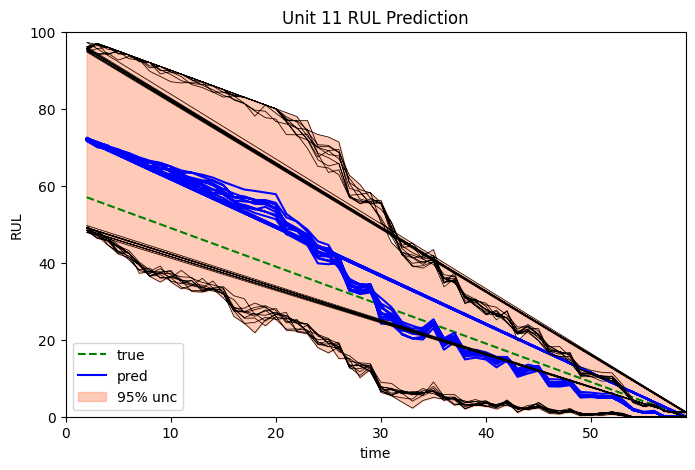

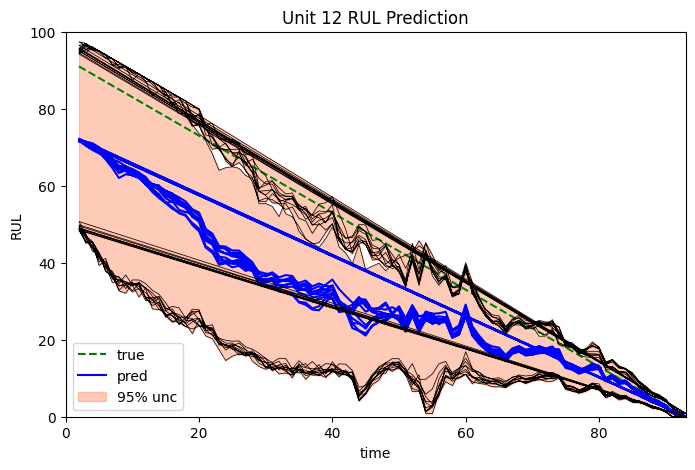

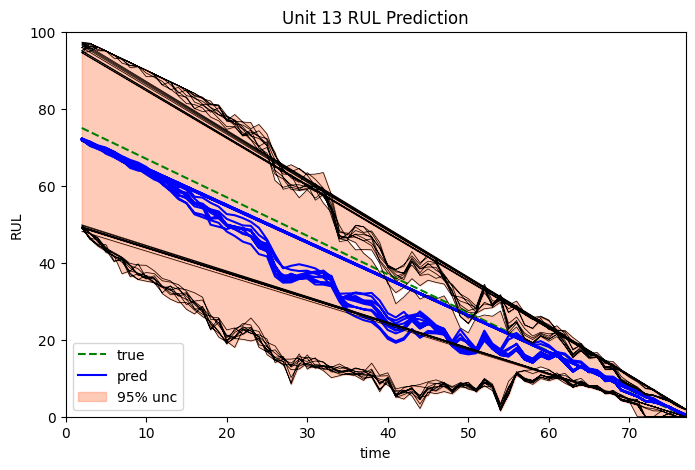

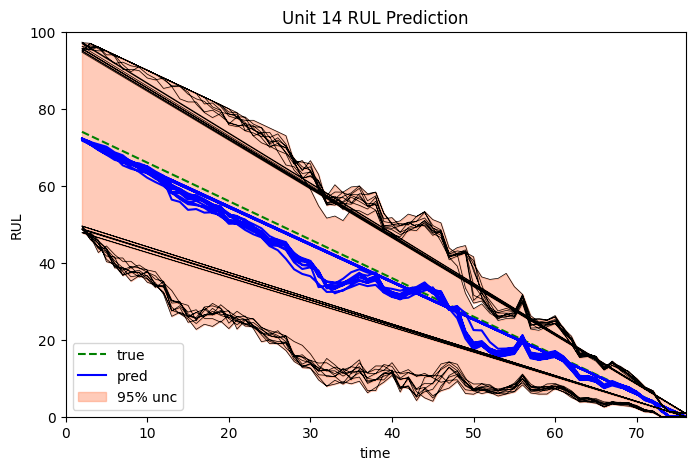

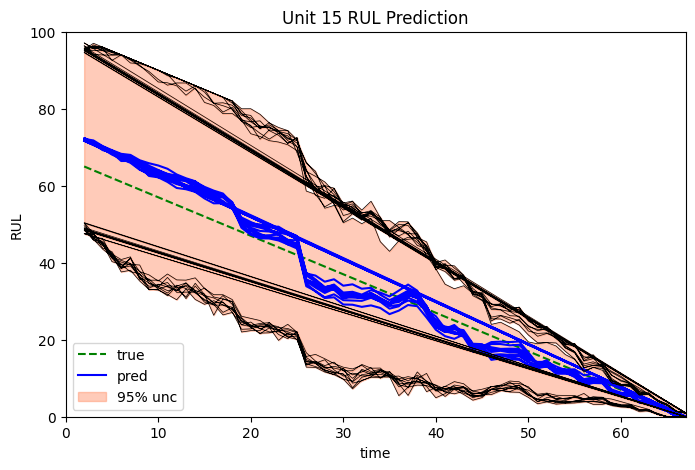

In [29]:
units = preds_df['unit'].unique()
for unit in units:
	fig, ax = plt.subplots(figsize=(8, 5))
	df = preds_df[preds_df['unit']==unit]
	eol_time = df['time'].iloc[-1]
	plot_rul_from_dataframe(ax=ax, df=preds_df[preds_df['unit']==unit], t_max=eol_time, 
			title=f"Unit {unit} RUL Prediction", unc_label="95% unc" )